In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exploratory Data Analysis (EDA)

**Author: Giuseppe Vescina**

This EDA represents the initial phase in helping the **Mayor's Office for Policing And Crime (MOPAC)**, and aims to refine our problem definition concerning public trust and confidence in policing. Our primary data source for this analysis is the **Public Attitude Survey (PAS)**, which solicits feedback from London residents about their policing experiences and perceptions of crime. The survey, conducted evenly across London's 32 boroughs, targets around 600 residents per borough each year. For the fiscal year 2023-24, the survey aims to gather opinions from over 19,000 residents.

Survey results are collected quarterly, with data available from Q1 of FY 2021-22 through Q3 of FY 2023-24, accessible on [MOPAC's website](https://data.london.gov.uk/dataset/mopac-surveys).

However, the use of PDF format for these data sets poses a significant challenge for analysis. To address this, I have consolidated the data into a single CSV file for easier manipulation.

## The 32 London Boroughs covered include:
- Barking and Dagenham
- Barnet
- Bexley
- Brent
- Bromley
- Camden
- Croydon
- Ealing
- Enfield
- Greenwich
- Hackney
- Hammersmith and Fulham
- Haringey
- Harrow
- Havering
- Hillingdon
- Hounslow
- Islington
- Kensington and Chelsea
- Kingston upon Thames
- Lambeth
- Lewisham
- Merton
- Newham
- Redbridge
- Richmond upon Thames
- Southwark
- Sutton
- Tower Hamlets
- Waltham Forest
- Wandsworth
- Westminster

## Key Variables in the Dataset:
- **good_job**: Perception of police effectiveness in the local area.
- **trust**: Trust in the Metropolitan Police Service as a reliable organization.
- **fair_treatment**: Agreement that the police treat all individuals equitably, regardless of background.
- **dealing_issues**: Agreement that the police address the community's significant concerns.
- **quarter**: Quarter in which the data was surveyed (integer).
    - 1: April 1st to June 30th
    - 2 (Second Quarter): July 1st to September 30th
    - 3 (Third Quarter): October 1st to December 31st
    - 4 (Fourth Quarter): January 1st to March 31st
- **year**: Period spanning from the start to the end of the survey year, e.g. "23-24".
- **year_int**: Integer of the year in which the data was surveyed

In [146]:
pas = pd.read_csv("../data/pas_boroughs.csv")
pas.isnull().sum()
# We import the pas dataset and check that there's no null values

borough           0
good_job          0
trust             0
fair_treatment    0
dealing_issues    0
quarter           0
year              0
year_int          0
dtype: int64

In [147]:
pas.head()

,borough,good_job,trust,fair_treatment,dealing_issues,quarter,year,year_int
0,Barking and Dagenham,0.48,0.71,0.63,0.59,3.0,23-24,2023
1,Barnet,0.47,0.70,0.60,0.62,3.0,23-24,2023
2,Bexley,0.54,0.74,0.71,0.58,3.0,23-24,2023
3,Brent,0.49,0.75,0.64,0.63,3.0,23-24,2023
4,Bromley,0.51,0.68,0.60,0.52,3.0,23-24,2023


In [148]:
pas.tail()

,borough,good_job,trust,fair_treatment,dealing_issues,quarter,year,year_int
347,Sutton,0.61,0.86,0.78,0.78,1.0,21-22,2021
348,Tower Hamlets,0.45,0.76,0.66,0.61,1.0,21-22,2021
349,Waltham Forest,0.54,0.80,0.68,0.67,1.0,21-22,2021
350,Wandsworth,0.57,0.78,0.63,0.70,1.0,21-22,2021
351,Westminster,0.52,0.84,0.72,0.66,1.0,21-22,2021


In [149]:
pas.describe() 

,good_job,trust,fair_treatment,dealing_issues,quarter,year_int
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,0.501392,0.728920,0.637159,0.603466,2.363636,2022.090909
std,0.063273,0.069335,0.091859,0.073372,1.069460,0.793655
min,0.370000,0.530000,0.380000,0.390000,1.000000,2021.000000
25%,0.460000,0.680000,0.570000,0.560000,1.000000,2021.000000
50%,0.500000,0.740000,0.640000,0.600000,2.000000,2022.000000
75%,0.540000,0.780000,0.710000,0.650000,3.000000,2023.000000
max,0.700000,0.870000,0.860000,0.800000,4.000000,2023.000000


In [150]:
pas_21_22 = pas[pas['year'] == '21-22']
pas_22_23 = pas[pas['year'] == '22-23']
pas_23_24 = pas[pas['year'] == '23-24']
# Dividing the DataFrame into subsets based on different years to analyze potential changes over time

In [151]:
pas_21_22.describe()

,good_job,trust,fair_treatment,dealing_issues,quarter,year_int
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,0.521563,0.768359,0.655547,0.636719,2.500000,2021.250000
std,0.064202,0.056510,0.088521,0.057413,1.122427,0.434714
min,0.370000,0.600000,0.390000,0.460000,1.000000,2021.000000
25%,0.480000,0.737500,0.590000,0.590000,1.750000,2021.000000
50%,0.510000,0.770000,0.660000,0.635000,2.500000,2021.000000
75%,0.560000,0.802500,0.720000,0.670000,3.250000,2021.250000
max,0.700000,0.870000,0.810000,0.790000,4.000000,2022.000000


In [152]:
pas_22_23.describe()

,good_job,trust,fair_treatment,dealing_issues,quarter,year_int
count,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000
mean,0.493516,0.712422,0.626016,0.59250,2.500000,2022.250000
std,0.057611,0.062352,0.091620,0.06809,1.122427,0.434714
min,0.380000,0.530000,0.380000,0.39000,1.000000,2022.000000
25%,0.457500,0.670000,0.550000,0.55000,1.750000,2022.000000
50%,0.490000,0.720000,0.620000,0.59000,2.500000,2022.000000
75%,0.530000,0.770000,0.700000,0.64000,3.250000,2022.250000
max,0.640000,0.840000,0.860000,0.80000,4.000000,2023.000000


In [153]:
pas_23_24.describe()

,good_job,trust,fair_treatment,dealing_issues,quarter,year_int
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.0
mean,0.485000,0.698333,0.627500,0.573750,2.000000,2023.0
std,0.062778,0.069912,0.093606,0.082107,0.820783,0.0
min,0.380000,0.560000,0.470000,0.390000,1.000000,2023.0
25%,0.440000,0.647500,0.550000,0.520000,1.000000,2023.0
50%,0.480000,0.700000,0.620000,0.560000,2.000000,2023.0
75%,0.512500,0.750000,0.700000,0.620000,3.000000,2023.0
max,0.630000,0.840000,0.850000,0.780000,3.000000,2023.0


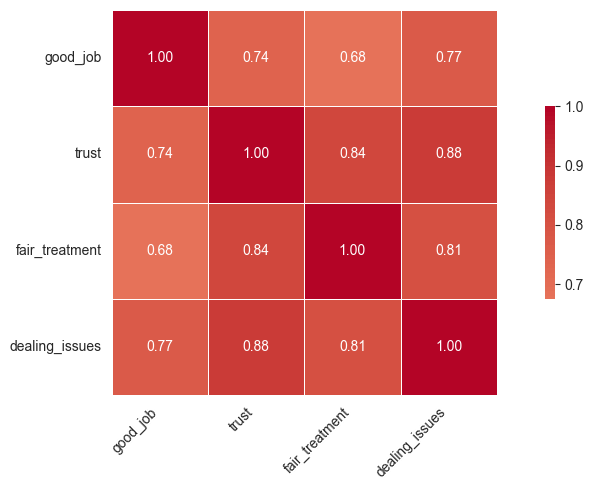

In [154]:
# Removing less relevant columns from the DataFrame
pas_numeric =  pas.drop(['borough', "year", "year_int", "quarter"], axis=1)

# Calculating the correlation matrix between numeric columns
correlation = pas_numeric.corr()
# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


plt.show() # Displaying the heatmap

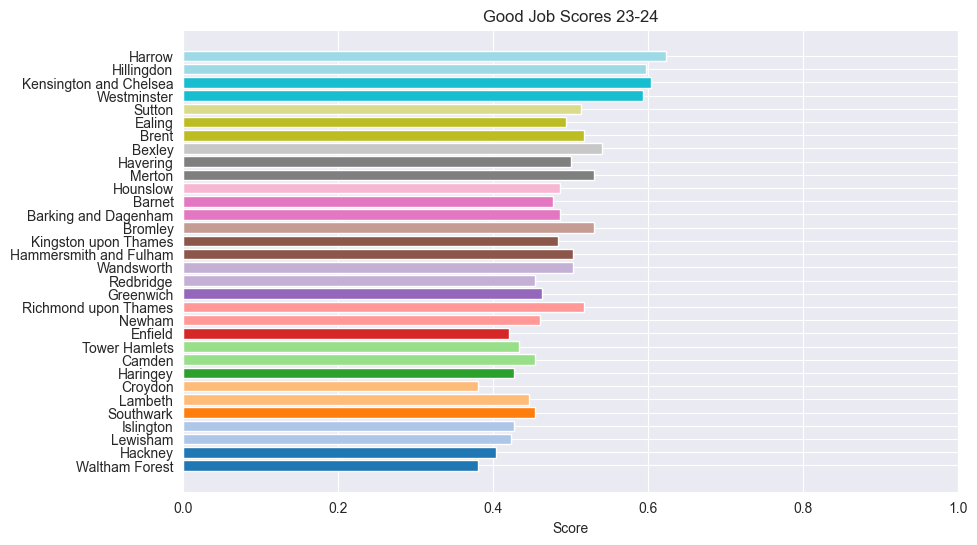

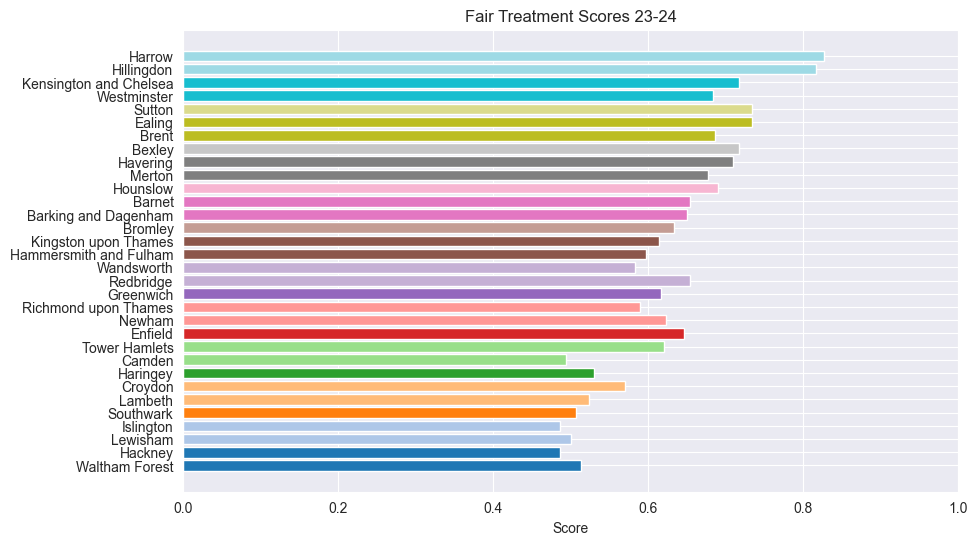

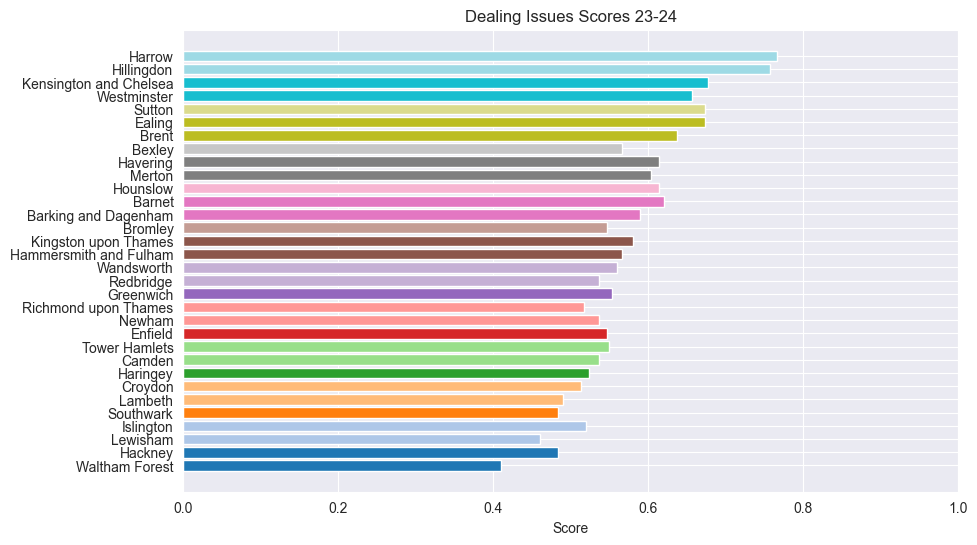

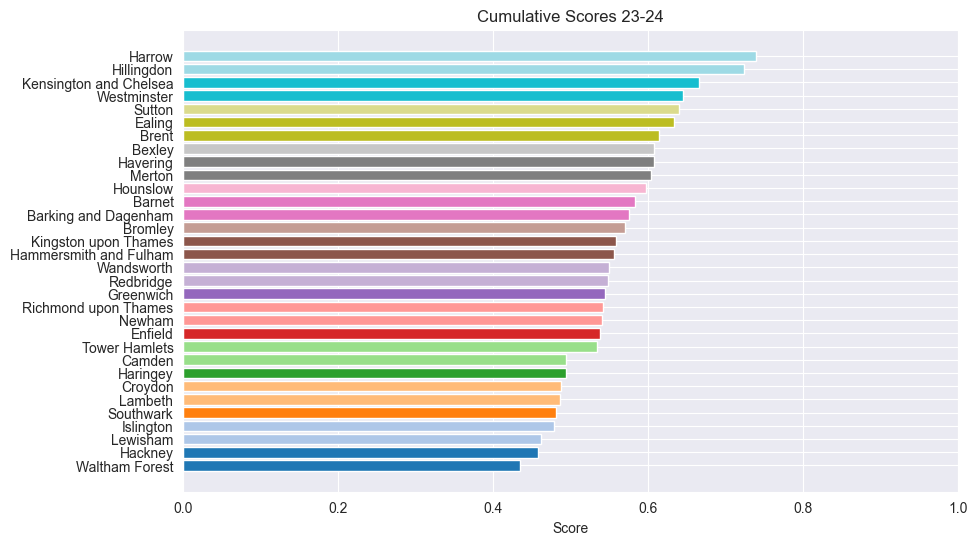

In [155]:
# Assuming 'pas_23_24' is your DataFrame
df_grouped = pas_23_24.groupby(['borough']).agg({
    'good_job': 'mean',
    'fair_treatment': 'mean',
    'dealing_issues': 'mean'
}).reset_index()

# Calculate a cumulative score as the average of the three scores
df_grouped['cumulative_score'] = df_grouped[['good_job', 'fair_treatment', 'dealing_issues']].mean(axis=1)
df_sorted = df_grouped.sort_values('cumulative_score')

# Generate a color map that assigns a unique color to each borough
colors = plt.get_cmap('tab20')(np.linspace(0, 1, len(df_sorted)))

# Good Job Scores
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['borough'], df_sorted['good_job'], color=colors)
plt.title('Good Job Scores 23-24')
plt.xlabel('Score')
plt.xlim(0, 1)
plt.show()

# Fair Treatment Scores
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['borough'], df_sorted['fair_treatment'], color=colors)
plt.title('Fair Treatment Scores 23-24')
plt.xlabel('Score')
plt.xlim(0, 1)
plt.show()

# Dealing Issues Scores
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['borough'], df_sorted['dealing_issues'], color=colors)
plt.title('Dealing Issues Scores 23-24')
plt.xlabel('Score')
plt.xlim(0, 1)
plt.show()

# Cumulative Scores
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['borough'], df_sorted['cumulative_score'], color=colors)
plt.title('Cumulative Scores 23-24')
plt.xlabel('Score')
plt.xlim(0, 1)
plt.show()

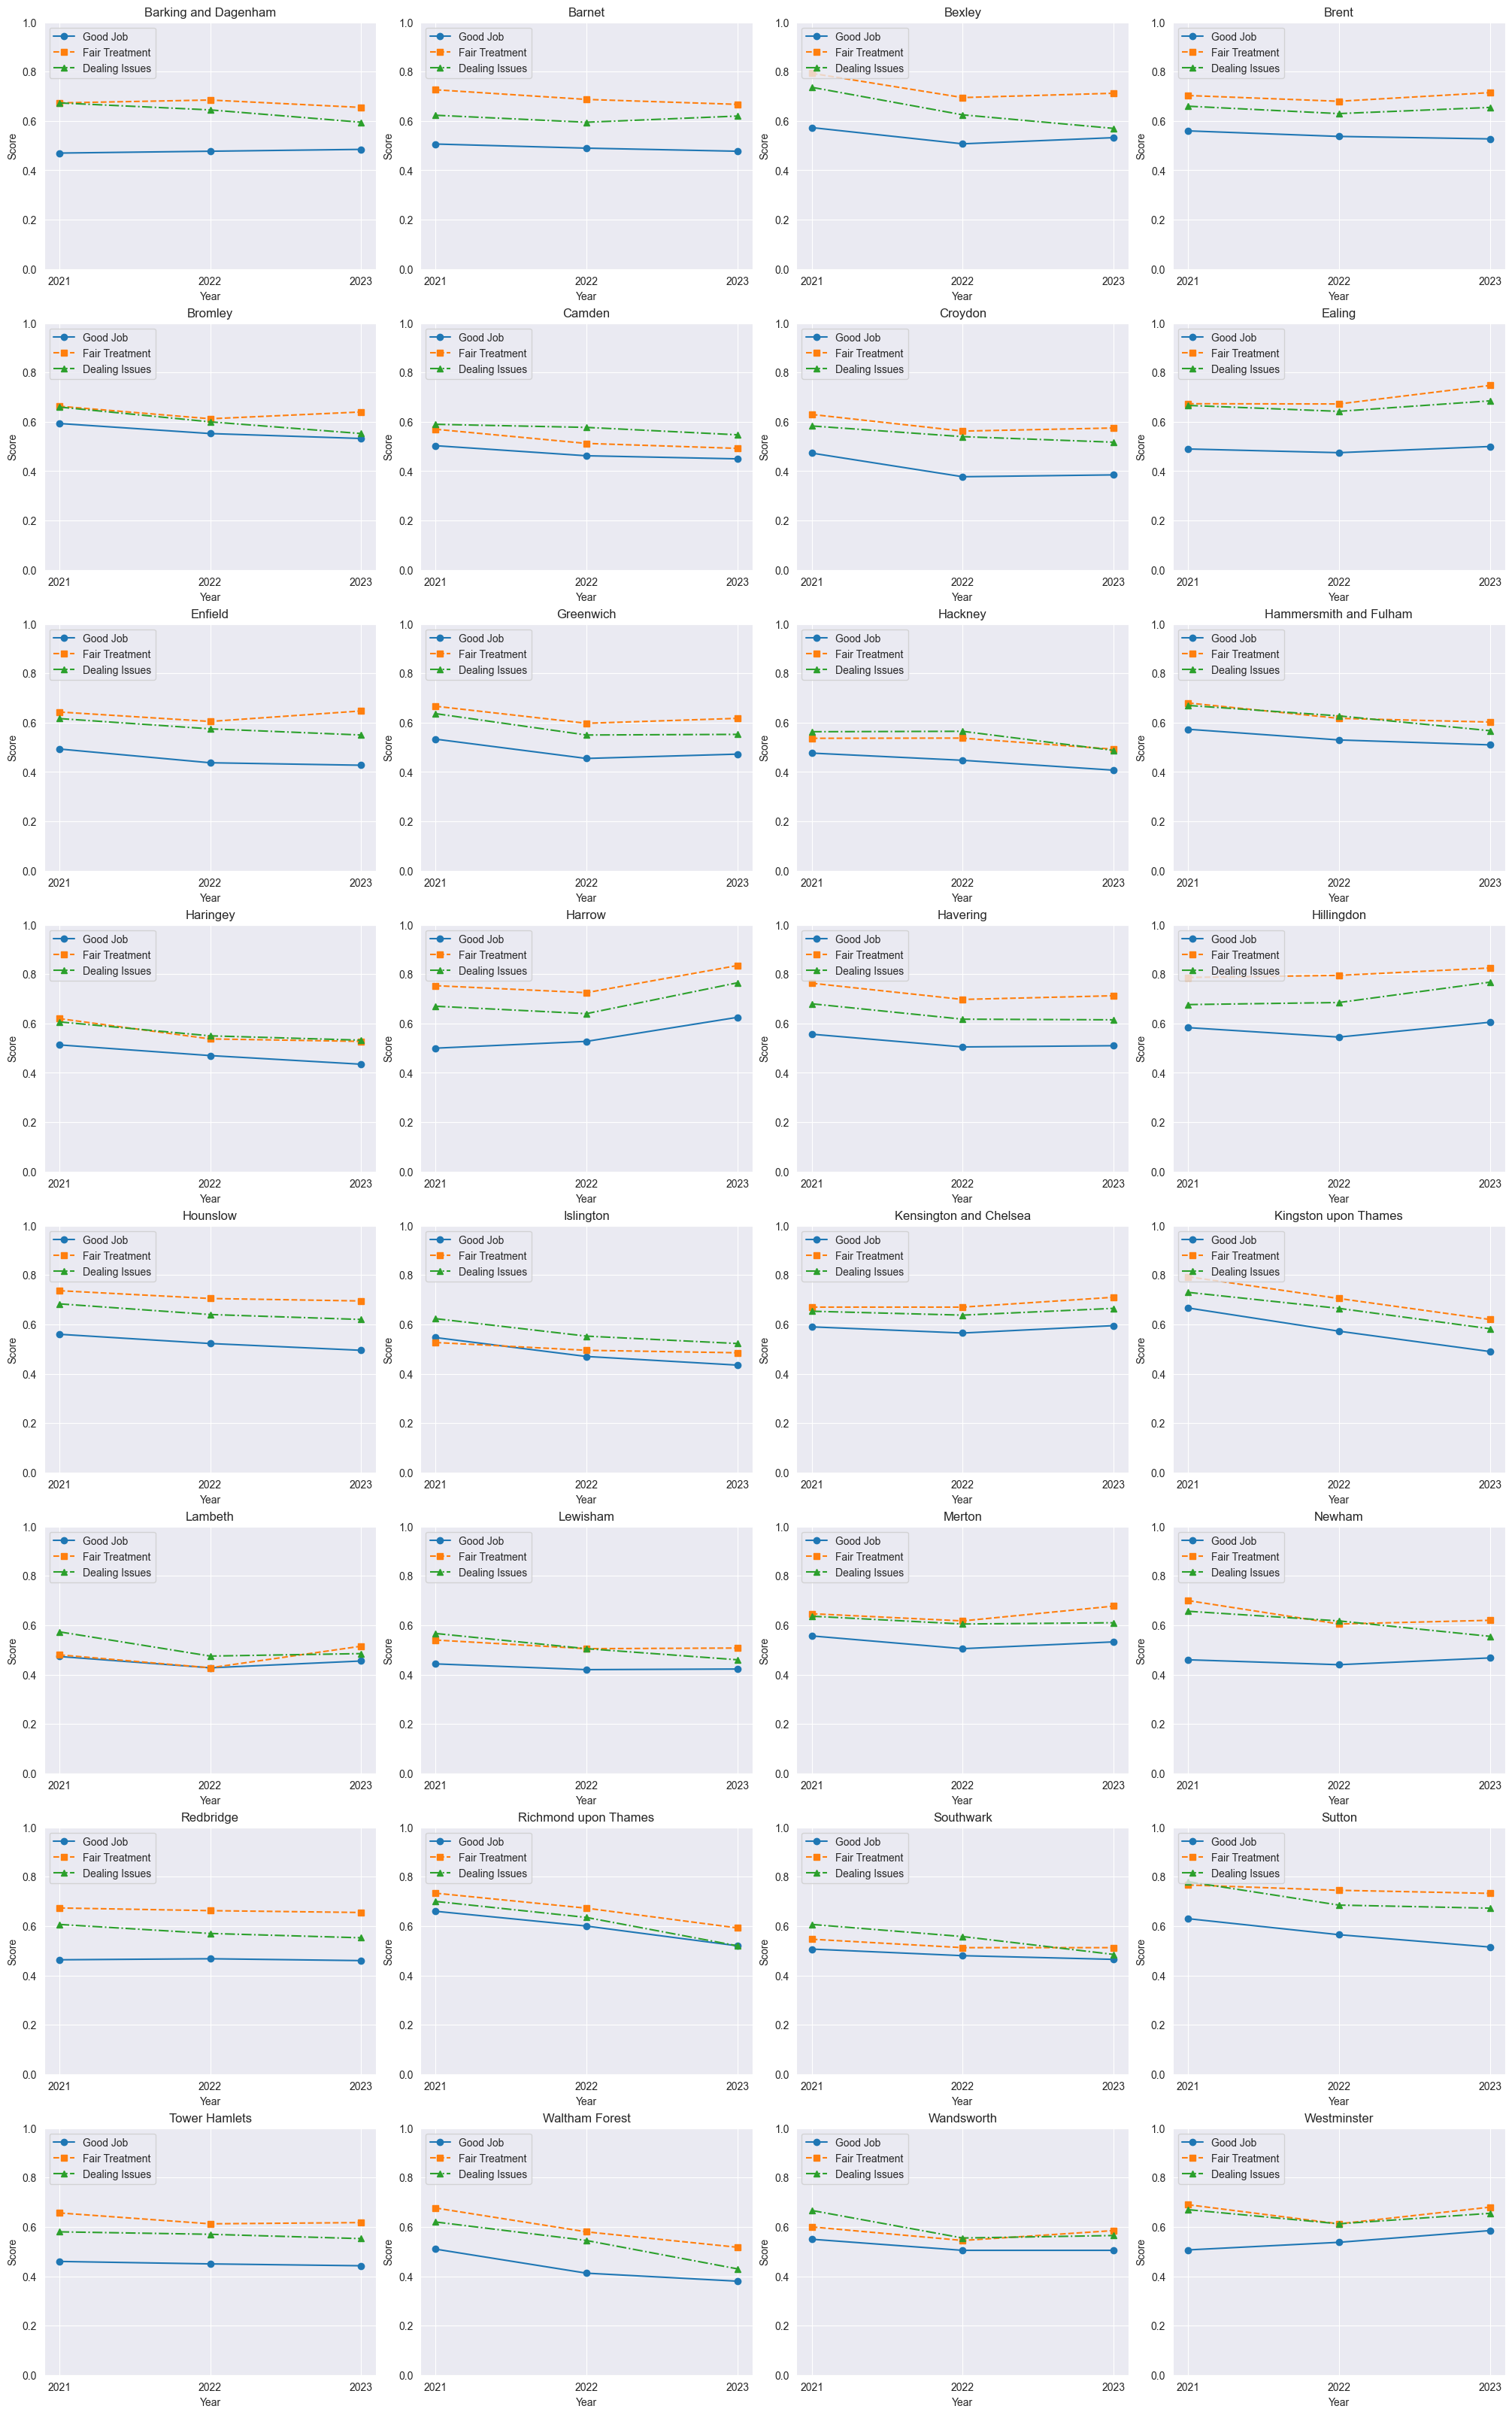

In [156]:
df_grouped = pas.groupby(['borough', 'year_int']).agg({
    'good_job': 'mean',
    'fair_treatment': 'mean',
    'dealing_issues': 'mean'
}).reset_index()

df_grouped_sorted = df_grouped.sort_values(['borough', 'year_int'])

cols = 4
num_boroughs = df_grouped_sorted['borough'].nunique()
rows = (num_boroughs + cols - 1) // cols  

fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), constrained_layout=True)

axs = axs.flatten()
for i, borough in enumerate(df_grouped_sorted['borough'].unique()):

    borough_data = df_grouped_sorted[df_grouped_sorted['borough'] == borough]
    
    axs[i].plot(borough_data['year_int'], borough_data['good_job'], marker='o', label='Good Job', linestyle='-')
    axs[i].plot(borough_data['year_int'], borough_data['fair_treatment'], marker='s', label='Fair Treatment', linestyle='--')
    axs[i].plot(borough_data['year_int'], borough_data['dealing_issues'], marker='^', label='Dealing Issues', linestyle='-.')

    axs[i].set_title(borough)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Score')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
    axs[i].set_ylim(0, 1)

    # Set x-axis ticks to only show start, mid, and end year
    year_ticks = borough_data['year_int'].unique()
    if len(year_ticks) > 3:  # Check if there are enough data points to subset
        axs[i].set_xticks([year_ticks[0], year_ticks[len(year_ticks)//2], year_ticks[-1]])
    else:
        axs[i].set_xticks(year_ticks)  # If not, use all available ticks

for ax in axs[i+1:]:
    ax.set_visible(False)

plt.show()

In [157]:
import pandas as pd

cumulative_22_23 = pas_22_23.groupby('borough').agg({
    'good_job': 'mean',
    'fair_treatment': 'mean',
    'dealing_issues': 'mean'
}).mean(axis=1).reset_index(name='mean_cumulative_score_22_23')

cumulative_23_24 = pas_23_24.groupby('borough').agg({
    'good_job': 'mean',
    'fair_treatment': 'mean',
    'dealing_issues': 'mean'
}).mean(axis=1).reset_index(name='mean_cumulative_score_23_24')

cumulative_scores = pd.merge(cumulative_22_23, cumulative_23_24, on='borough')

cumulative_scores['difference'] = cumulative_scores['mean_cumulative_score_23_24'] - cumulative_scores['mean_cumulative_score_22_23']
cumulative_scores_sorted = cumulative_scores.sort_values(by='difference', ascending=True)

cumulative_scores_sorted

,borough,mean_cumulative_score_22_23,mean_cumulative_score_23_24,difference
19,Kingston upon Thames,0.617500,0.558889,-0.058611
25,Richmond upon Thames,0.598333,0.541111,-0.057222
29,Waltham Forest,0.485833,0.434444,-0.051389
10,Hackney,0.501667,0.457778,-0.043889
11,Hammersmith and Fulham,0.586667,0.555556,-0.031111
26,Southwark,0.511667,0.481111,-0.030556
17,Islington,0.499167,0.477778,-0.021389
0,Barking and Dagenham,0.596667,0.575556,-0.021111
12,Haringey,0.514167,0.493333,-0.020833
24,Redbridge,0.568333,0.547778,-0.020556


In [158]:

# Assign a binary value for decrease (1 if decrease, 0 if not)
cumulative_scores['decreased'] = (cumulative_scores['difference'] < 0).astype(int)

# Ranking boroughs based on their initial cumulative scores (lower score, lower rank number)
cumulative_scores['initial_rank'] = cumulative_scores['mean_cumulative_score_22_23'].rank(method='min')

# Calculating the correlation between the initial rank and whether the score decreased
correlation = cumulative_scores[['initial_rank', 'decreased']].corr().iloc[0, 1]

print("Correlation between being ranked low initially and experiencing a decrease in score:", correlation)

Correlation between being ranked low initially and experiencing a decrease in score: -0.28643198105944295


While there is a correlation, it is weak. This suggests that there is a slight tendency for boroughs with higher initial cumulative scores to experience a decrease in their scores, but the relationship is not strong.

We can further enhance our analysis by considering spatial correlations between neighboring boroughs. The adjacent boroughs are listed below, outlining their neighbors for each respective borough.

| Borough                  | Neighbors                                            |
|--------------------------|------------------------------------------------------|
| Barking and Dagenham     | Havering, Redbridge, Newham                          |
| Barnet                   | Harrow, Brent, Camden, Haringey, Enfield             |
| Bexley                   | Bromley, Greenwich                                   |
| Brent                    | Harrow, Barnet, Camden, Westminster, Ealing, Hammersmith and Fulham |
| Bromley                  | Lewisham, Greenwich, Bexley, Croydon, Sutton         |
| Camden                   | Barnet, Haringey, Islington, Westminster, Brent      |
| Croydon                  | Lambeth, Bromley, Sutton, Merton                     |
| Ealing                   | Hounslow, Hillingdon, Hammersmith and Fulham, Brent  |
| Enfield                  | Barnet, Haringey                                     |
| Greenwich                | Bexley, Bromley, Lewisham, Newham, Tower Hamlets     |
| Hackney                  | Islington, Haringey, Waltham Forest, Newham, Tower Hamlets |
| Hammersmith and Fulham   | Kensington and Chelsea, Westminster, Wandsworth, Ealing, Brent |
| Haringey                 | Enfield, Barnet, Islington, Hackney, Waltham Forest  |
| Harrow                   | Hillingdon, Ealing, Brent, Barnet                    |
| Havering                 | Barking and Dagenham, Redbridge                      |
| Hillingdon               | Harrow, Ealing, Hounslow                             |
| Hounslow                 | Hillingdon, Ealing, Richmond upon Thames, Hammersmith and Fulham |
| Islington                | Camden, Hackney, Haringey, Westminster               |
| Kensington and Chelsea  | Hammersmith and Fulham, Westminster, Brent          |
| Kingston upon Thames     | Richmond upon Thames, Merton, Sutton                 |
| Lambeth                  | Wandsworth, Southwark, Lewisham, Croydon             |
| Lewisham                 | Southwark, Greenwich, Bromley, Lambeth               |
| Merton                   | Wandsworth, Kingston upon Thames, Sutton, Croydon    |
| Newham                   | Barking and Dagenham, Waltham Forest, Hackney, Tower Hamlets, Greenwich |
| Redbridge                | Barking and Dagenham, Havering, Waltham Forest, Newham |
| Richmond upon Thames     | Kingston upon Thames, Hounslow, Wandsworth           |
| Southwark                | Lambeth, Lewisham, Bromley                           |
| Sutton                   | Croydon, Kingston upon Thames, Merton, Bromley       |
| Tower Hamlets            | Newham, Hackney, Greenwich                           |
| Waltham Forest           | Enfield, Haringey, Hackney, Redbridge, Newham        |
| Wandsworth               | Kingston upon Thames, Richmond upon Thames, Merton, Lambeth, Hammersmith and Fulham |
| Westminster              | Camden, Brent, Kensington and Chelsea, Lambeth, Wandsworth, Hammersmith and Fulham, Islington |


In [159]:
neighbors = {
    "Barking and Dagenham": ["Havering", "Redbridge", "Newham"],
    "Barnet": ["Harrow", "Brent", "Camden", "Haringey", "Enfield"],
    "Bexley": ["Bromley", "Greenwich"],
    "Brent": ["Harrow", "Barnet", "Camden", "Westminster", "Ealing", "Hammersmith and Fulham"],
    "Bromley": ["Lewisham", "Greenwich", "Bexley", "Croydon", "Sutton"],
    "Camden": ["Barnet", "Haringey", "Islington", "Westminster", "Brent"],
    "Croydon": ["Lambeth", "Bromley", "Sutton", "Merton"],
    "Ealing": ["Hounslow", "Hillingdon", "Hammersmith and Fulham", "Brent"],
    "Enfield": ["Barnet", "Haringey"],
    "Greenwich": ["Bexley", "Bromley", "Lewisham", "Newham", "Tower Hamlets"],
    "Hackney": ["Islington", "Haringey", "Waltham Forest", "Newham", "Tower Hamlets"],
    "Hammersmith and Fulham": ["Kensington and Chelsea", "Westminster", "Wandsworth", "Ealing", "Brent"],
    "Haringey": ["Enfield", "Barnet", "Islington", "Hackney", "Waltham Forest"],
    "Harrow": ["Hillingdon", "Ealing", "Brent", "Barnet"],
    "Havering": ["Barking and Dagenham", "Redbridge"],
    "Hillingdon": ["Harrow", "Ealing", "Hounslow"],
    "Hounslow": ["Hillingdon", "Ealing", "Richmond upon Thames", "Hammersmith and Fulham"],
    "Islington": ["Camden", "Hackney", "Haringey", "Westminster"],
    "Kensington and Chelsea": ["Hammersmith and Fulham", "Westminster", "Brent"],
    "Kingston upon Thames": ["Richmond upon Thames", "Merton", "Sutton"],
    "Lambeth": ["Wandsworth", "Southwark", "Lewisham", "Croydon"],
    "Lewisham": ["Southwark", "Greenwich", "Bromley", "Lambeth"],
    "Merton": ["Wandsworth", "Kingston upon Thames", "Sutton", "Croydon"],
    "Newham": ["Barking and Dagenham", "Waltham Forest", "Hackney", "Tower Hamlets", "Greenwich"],
    "Redbridge": ["Barking and Dagenham", "Havering", "Waltham Forest", "Newham"],
    "Richmond upon Thames": ["Kingston upon Thames", "Hounslow", "Wandsworth"],
    "Southwark": ["Lambeth", "Lewisham", "Bromley"],
    "Sutton": ["Croydon", "Kingston upon Thames", "Merton", "Bromley"],
    "Tower Hamlets": ["Newham", "Hackney", "Greenwich"],
    "Waltham Forest": ["Enfield", "Haringey", "Hackney", "Redbridge", "Newham"],
    "Wandsworth": ["Kingston upon Thames", "Richmond upon Thames", "Merton", "Lambeth", "Hammersmith and Fulham"],
    "Westminster": ["Camden", "Brent", "Kensington and Chelsea", "Lambeth", "Wandsworth", "Hammersmith and Fulham", "Islington"]
}

In [160]:

df_grouped = pas.groupby(['borough']).agg({
    'good_job': 'mean',
    'fair_treatment': 'mean',
    'dealing_issues': 'mean'
}).mean(axis=1).reset_index(name='cumulative_score')

df_grouped['neighbor_avg_score'] = df_grouped['borough'].apply(
    lambda x: np.mean([df_grouped[df_grouped['borough'] == neighbor]['cumulative_score'].values[0] 
                       for neighbor in neighbors[x] if neighbor in df_grouped['borough'].values])
)

# Calculating the correlation between a borough's score and its neighbors' average score
correlation = df_grouped['cumulative_score'].corr(df_grouped['neighbor_avg_score'])

print("Correlation between borough scores and their neighbors' scores:", correlation)


Correlation between borough scores and their neighbors' scores: 0.811973857566837


The analysis reveals a strong positive correlation of 0.812 between the cumulative scores of London boroughs and the average cumulative scores of their neighboring boroughs. This high correlation suggests that boroughs geographically close to each other tend to have similar public perceptions and confidence in policing. Such a pattern could indicate shared regional factors or similar policing strategies across neighboring areas, influencing public attitudes consistently across these regions.